In [196]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities

In [197]:
data = 'feature_metric.csv'

df = pd.read_csv(data)
df = df[['region', 'measure', 'epoch_', 'value',
       'Subject', 'Score_median_first20']]

In [198]:
### agg cortex into 14 nodes

In [199]:
r = df.region.drop_duplicates()
r

0       7Networks_LH_Vis_1
1       7Networks_LH_Vis_2
2       7Networks_LH_Vis_3
3       7Networks_LH_Vis_4
4       7Networks_LH_Vis_5
               ...        
1035             Vermis IX
1036              Right IX
1037                Left X
1038              Vermis X
1039               Right X
Name: region, Length: 1040, dtype: object

In [200]:
cortex = r[:998].apply(lambda x: x[10:].split('_'))
cortex = cortex.tolist()
cortex = pd.DataFrame(cortex, columns=['hemisphere', 'network', 'position', 'num'])
cortex['num'] = cortex.apply(lambda r: r['position'] if not r['num'] else r['num'], axis=1)
cortex['position'] = cortex.apply(lambda r: None if not r['num'] != r['position'] else r['position'], axis=1)
cortex

,hemisphere,network,position,num
0,LH,Vis,None,1
1,LH,Vis,None,2
2,LH,Vis,None,3
3,LH,Vis,None,4
4,LH,Vis,None,5
...,...,...,...,...
993,RH,Default,pCunPCC,16
994,RH,Default,pCunPCC,17
995,RH,Default,pCunPCC,18
996,RH,Cont,pCun,2


In [201]:
cortex.describe()

,hemisphere,network,position,num
count,998,998,643,998
unique,2,7,23,103
top,LH,Default,Post,1
freq,500,212,102,49


In [202]:
subc = r[998:].apply(lambda x: x.split(' '))
subc = subc.to_list()
subc = pd.DataFrame(subc, columns=['hemisphere', 'network', 'position'])
subc['num'] = None
subc.describe()

,hemisphere,network,position,num
count,42,42,6,0
unique,3,16,2,0
top,Left,Crus,I,NaN
freq,17,6,3,NaN


In [203]:
cortex['r'] = 'cor_' + cortex['hemisphere'] + '_' + cortex['network']
subc['r'] = 'subc_' + subc['hemisphere']
# 14 regions from cortex, 3 regions from subc

In [205]:
regions_agg = pd.concat([cortex.r, subc.r], axis=0).reset_index(drop=True)
regions_agg = pd.concat([regions_agg.rename('region_agg'), r], axis=1)
regions_agg

,region_agg,region
0,cor_LH_Vis,7Networks_LH_Vis_1
1,cor_LH_Vis,7Networks_LH_Vis_2
2,cor_LH_Vis,7Networks_LH_Vis_3
3,cor_LH_Vis,7Networks_LH_Vis_4
4,cor_LH_Vis,7Networks_LH_Vis_5
...,...,...
1035,subc_Vermis,Vermis IX
1036,subc_Right,Right IX
1037,subc_Left,Left X
1038,subc_Vermis,Vermis X


In [206]:
dfecc = df[df['measure'] == 'eccentricity']
dfecc = df[df['epoch_'] == 'b2e']
dfecc = dfecc.merge(regions_agg, on='region')

In [207]:
# dfecc.groupby(['Subject', 'measure', 'epoch_', 'region_agg'])['value'].mean()
# by default, pivot_table takes mean

In [208]:
dfecc = dfecc.pivot_table(columns=['epoch_', 'region_agg'],
               values=['value'],
               index=['Subject', 'Score_median_first20'])

dfecc

value                                 \
epoch_                               b2e                                  
region_agg                   cor_LH_Cont cor_LH_Default cor_LH_DorsAttn   
Subject Score_median_first20                                              
AB1     14.0                    0.096832       0.285795        0.336393   
AG1     47.0                    0.023247       0.134270        0.016678   
AH1     41.5                   -0.323308      -0.037860       -0.711544   
AM1     27.0                    0.175577       0.412751        0.288554   
AP1     17.0                    0.467508       0.169592       -0.193752   
AV1     48.5                   -0.038907      -0.278500        0.676340   
BN1     75.0                    0.056349      -0.016979       -0.353304   
CD1     15.0                    0.051840      -0.055279       -0.196941   
CG1     32.0                    0.108409       0.024720        0.175183   
CH1     39.0                    0.177342      -0.087421       -0.016997   
CK1     34.0                    0.086924       0.137110        0.299040   
CM1     29.5                    0.210084      -0.287603        0.282841   
CM2     73.0                    0.268694       0.294601       -0.253968   
EH1     21.0                    0.387339       0.257275        0.291328   
EK1     12.0                    0.013718      -0.145739        0.582988   
HK1     17.0                    0.321216       0.582425        0.415549   
HS1     67.0                    0.170226      -0.168491        0.353160   
JC1     12.5                    0.441986       0.234091        0.437221   
JH1     8.5                    -0.026666       0.106128        0.104092   
JM1     34.0                   -0.281974      -0.076701        0.006779   
JR1     34.0                   -0.072512       0.251876       -0.125334   
JS1     57.0                    0.057821       0.119935        0.076817   
KK1     11.5                   -0.025902       0.484708        0.069643   
KP1     38.0                    0.131821       0.172627        0.242722   
KR1     25.0                    0.492554       0.689035        0.391546   
LB1     12.0                   -0.088604       0.422639        0.162973   
MB1     39.0                   -0.056847       0.236683       -0.310333   
MG1     57.0                   -0.252071      -0.571489       -0.340796   
MP1     45.0                    0.038101      -0.436873       -0.311200   
NW1     26.0                   -0.284932      -0.155696        0.231738   
SK1     39.0                    0.353440       0.344001       -0.212267   
SM2     44.0                    0.156058       0.257919        0.384763   
SR1     21.5                   -0.047300      -0.070251       -0.042661   
UP1     46.0                    0.141589       0.151221        0.142272   
WK1     62.0                    0.068048       0.233606        0.053965   
ZN1     55.0                    0.146824      -0.541973       -0.176711   

                                                                             \
epoch_                                                                        
region_agg                   cor_LH_Limbic cor_LH_SalVentAttn cor_LH_SomMot   
Subject Score_median_first20                                                  
AB1     14.0                      0.191118           0.141011      0.004024   
AG1     47.0                     -0.172098           0.584519      0.466026   
AH1     41.5                     -0.305593          -0.227577      0.013477   
AM1     27.0                      0.048740           0.684970      0.351564   
AP1     17.0                     -0.240978           0.309113     -0.226975   
AV1     48.5                     -0.182464           0.137662      0.267408   
BN1     75.0                     -0.461987          -0.095968     -0.302246   
CD1     15.0                     -0.095444          -0.239501     -0.159295   
CG1     32.0                     -0.050737          -0.377077     -0.248930   
CH1    

In [224]:
# dfecc[('value',  'b2e', 'cor_LH_Cont')]

In [210]:
X = dfecc.reset_index().drop(['Subject', 'Score_median_first20'], axis=1)

y = dfecc.reset_index()['Score_median_first20']

/var/folders/2q/y6tqndfj1yqfc7hcdp99tz_00000gn/T/ipykernel_18449/1566465353.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = dfecc.reset_index().drop(['Subject', 'Score_median_first20'], axis=1)


In [212]:
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y,
                           # enable_categorical=True
                           )

In [213]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [216]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 50,
          'max_depth': 5,
          'eta': 0.1,
          'subsample': .7,
          'colsample_bytree': 0.05}

xgb_clf = XGBRegressor(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

mean_squared_error(y_train, xgb_clf.predict(X_train))

22.73254208230508

In [217]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

In [218]:
y_test

31    44.0
20    34.0
16    67.0
30    39.0
22    11.5
15    17.0
10    34.0
2     41.5
11    29.5
29    26.0
27    57.0
Name: Score_median_first20, dtype: float64

In [219]:
y_pred

array([34.30821 , 32.223026, 20.805454, 34.209915, 23.603525, 26.479153,
       27.530115, 38.610466, 39.014343, 35.81768 , 48.528263],
      dtype=float32)

In [220]:
# compute and print accuracy score


print('XGBoost model mean sq error: {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))

XGBoost model mean sq error: 254.4734


# **6. Feature importance with XGBoost** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


- XGBoost provides a way to examine the importance of each feature in the original dataset within the model. 

- It involves counting the number of times each feature is split on across all boosting trees in the model. 

- Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.

- XGBoost has a **plot_importance()** function that helps us to achieve this task. 

- Then we can visualize the features that has been given the highest important score among all the features. 

- Thus XGBoost provides us a way to do feature selection.

- We will proceed as follows:-

In [221]:
scores = xgb_clf.get_booster().get_score()
len(scores)

16

In [222]:
scores

{'value b2e cor_LH_Cont': 12.0,
 'value b2e cor_LH_Default': 18.0,
 'value b2e cor_LH_DorsAttn': 5.0,
 'value b2e cor_LH_Limbic': 10.0,
 'value b2e cor_LH_SalVentAttn': 43.0,
 'value b2e cor_LH_SomMot': 27.0,
 'value b2e cor_LH_Vis': 29.0,
 'value b2e cor_RH_Cont': 9.0,
 'value b2e cor_RH_Default': 40.0,
 'value b2e cor_RH_DorsAttn': 26.0,
 'value b2e cor_RH_Limbic': 19.0,
 'value b2e cor_RH_SalVentAttn': 36.0,
 'value b2e cor_RH_SomMot': 29.0,
 'value b2e cor_RH_Vis': 22.0,
 'value b2e subc_Left': 26.0,
 'value b2e subc_Right': 15.0}

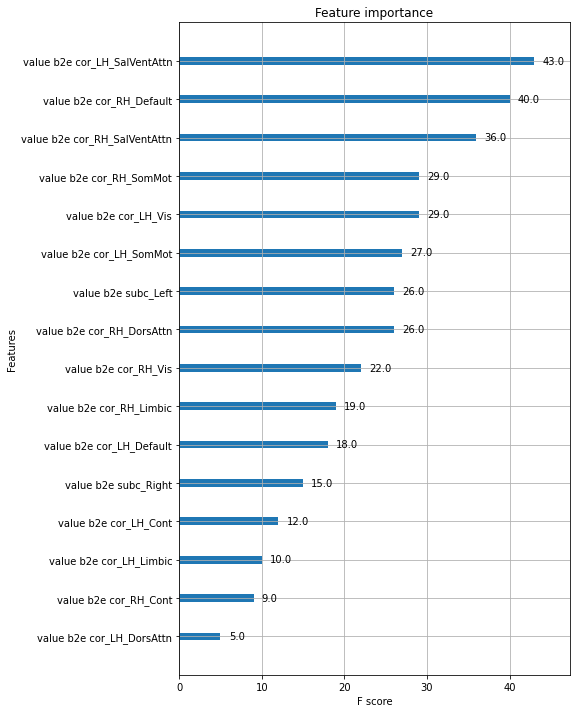

In [223]:
plt.rcParams["figure.figsize"] = (7, 12)

xgb.plot_importance(xgb_clf)

plt.show()

- We can see that the feature `Delicassesn` has been given the highest importance score among all the features. 

- Based upon this importance score, we can select the features with highest importance score and discard the redundant ones.

- Thus XGBoost also gives us a way to do feature selection.

# References** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


The ideas and concepts in this kernel are taken from the following websites -

-	https://www.datacamp.com/community/tutorials/xgboost-in-python

-	https://blog.cambridgespark.com/getting-started-with-xgboost-3ba1488bb7d4

-	https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

-	https://heartbeat.fritz.ai/boosting-your-machine-learning-models-using-xgboost-d2cabb3e948f

-	https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

-   https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5

-   https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d